Data Mining Assignment

Group: Haley Raynor and Antonella Portugal

# Business Understanding

# The problem we are trying to solve

We have decided to use terrorism data from the Global Terrorism Database (GTD) which has collected data about global terrorism starting from the 1970's. From this data we have decided to filter the results and focus on the events that occured in the USA. It is our hopes that we can use this data and use it to provide FBI (Fedral Bureau of Investigation) law enforcement agency in the US with a model that will help them predict the success of a terror attack based on certain variables.

The FBI is the USA's domestice intelligence and security service and its priimary federal law enforcement agency. Their main priorioty is protecting the citizens of its nation from cyber crimes, terrorism and counter intelligence as its main areas of focus however they also invesitgate in the areas of organized crime & violent crimes, upholding and protecting civil rights to child predators and serial killers.



In [2]:
import warnings
warnings.filterwarnings('ignore')

# Data Understanding

In [3]:
import pandas as pd

# df = pd.read_csv("globalterrorismdb_0718dist.csv",encoding="ISO-8859-1")
# in github, we can't upload the original dataset with all the countries, so this is the filtered version
df = pd.read_csv("USGlobalTerrorism.csv",encoding="ISO-8859-1")
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970010e+11,1970,1,1,NaN,0,NaN,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
1,1.970010e+11,1970,1,2,NaN,0,NaN,217,United States,1,...,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN
2,1.970010e+11,1970,1,2,NaN,0,NaN,217,United States,1,...,The New Years Gang issue a communiqué to a loc...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,NaN
3,1.970010e+11,1970,1,3,NaN,0,NaN,217,United States,1,...,"Karl Armstrong's girlfriend, Lynn Schultz, dro...",Committee on Government Operations United Stat...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0,0,0,0,NaN
4,1.970010e+11,1970,1,1,NaN,0,NaN,217,United States,1,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN


The original global terrorism dataset size is has 135 columns and 181,691 entries.

In [5]:
# Filter only the US
USdata= df[df["country_txt"]=="United States"]
USdata.head(2)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970010e+11,1970,1,1,NaN,0,NaN,217,United States,1,...,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
1,1.970010e+11,1970,1,2,NaN,0,NaN,217,United States,1,...,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN


In [6]:
# columns that we want to keep for the model
column_names = ["motive","provstate","success","attacktype1_txt","targtype1_txt","weaptype1_txt","weapsubtype1_txt"] #"summary",

In [7]:
fUS = USdata[column_names]
fUS.head()

,motive,provstate,success,attacktype1_txt,targtype1_txt,weaptype1_txt,weapsubtype1_txt
0,To protest the Cairo Illinois Police Deparment,Illinois,1,Armed Assault,Police,Firearms,Unknown Gun Type
1,NaN,California,1,Bombing/Explosion,Utilities,Explosives,Unknown Explosive Type
2,To protest the War in Vietnam and the draft,Wisconsin,1,Facility/Infrastructure Attack,Military,Incendiary,Molotov Cocktail/Petrol Bomb
3,To protest the War in Vietnam and the draft,Wisconsin,1,Facility/Infrastructure Attack,Government (General),Incendiary,Gasoline or Alcohol
4,NaN,Wisconsin,0,Bombing/Explosion,Military,Explosives,Unknown Explosive Type


In [8]:
fUS.shape

(2836, 7)

After filtering only the variables that we want to consider for the analysis and the model, and filtering out of the database only entries from the United States we end up with 7 columns and 2,836 entries.

In [9]:
fUS["success"].mean()

0.8251057827926658

82% of the attacks in the databse have been successful (data is inbalanced)

## Understanding variables

#### motive
This is a textual variable, meaning there's no limited categories and the motive of the attack is extracted from the attack report

In [9]:
fUS["motive"].unique()[0:10]

array(['To protest the Cairo Illinois Police Deparment', nan,
       'To protest the War in Vietnam and the draft',
       'Protest the draft and Vietnam War',
       'To protest United States owned businesses in Puerto Rico',
       'Suspected motives were to protest the Vietnam War and/or show support for the Black Panther Party and/or show support for the Young Lords.',
       'Retaliation for the store owner who shot and killed an African American attempting to commit a robbery at his store.',
       'The incident took place during disturbances between the Black Student Union and the university.',
       'The incident took place during heightened antiwar sentiments in Seattle Washington.',
       'Intimidate the Black Panther Party.'], dtype=object)

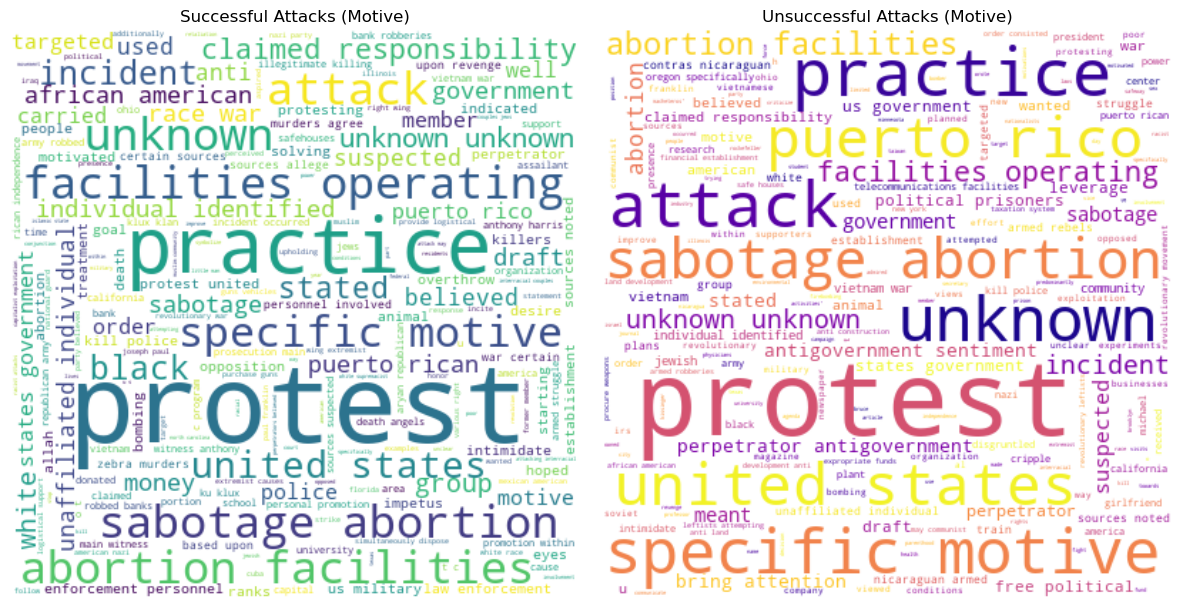

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load your dataset into a DataFrame. Let's assume your DataFrame is named df.
# Filter the DataFrame into two separate DataFrames for successful and unsuccessful attacks:
successful_attacks = fUS[fUS['success'] == 1].dropna()
unsuccessful_attacks = fUS[fUS['success'] == 0].dropna()

def generate_wordcloud(data, title, colormap):
    wordcloud = WordCloud(width=400, height=400, background_color='white', colormap=colormap).generate(data.lower())
    return wordcloud

wordcloud_successful = generate_wordcloud(' '.join(successful_attacks['motive']), "Successful Attacks", "viridis")
wordcloud_unsuccessful = generate_wordcloud(' '.join(unsuccessful_attacks['motive']), "Unsuccessful Attacks", "plasma")

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(wordcloud_successful, interpolation='bilinear')
axes[0].set_title("Successful Attacks (Motive)")
axes[0].axis("off")

axes[1].imshow(wordcloud_unsuccessful, interpolation='bilinear')
axes[1].set_title("Unsuccessful Attacks (Motive)")
axes[1].axis("off")

plt.tight_layout()
plt.show()

#### provstate

In [11]:
fUS["provstate"].value_counts()

California              595
New York                515
Puerto Rico             248
Florida                 158
Illinois                112
Washington              101
District of Columbia     83
Oregon                   67
Texas                    63
Massachusetts            57
Ohio                     51
New Jersey               47
Michigan                 45
Colorado                 45
Virginia                 42
Missouri                 39
Wisconsin                37
Maryland                 35
Arizona                  34
North Carolina           34
Pennsylvania             33
Georgia                  29
Minnesota                25
New Mexico               24
Nebraska                 24
Tennessee                24
Iowa                     24
Indiana                  22
Louisiana                22
Utah                     20
Nevada                   18
Connecticut              17
Alabama                  16
Oklahoma                 15
Kansas                   14
Idaho               

#### attacktype1_txt

In [12]:
fUS["attacktype1_txt"].value_counts()

Bombing/Explosion                      1383
Facility/Infrastructure Attack          864
Armed Assault                           284
Assassination                           133
Hostage Taking (Barricade Incident)      62
Unarmed Assault                          61
Hostage Taking (Kidnapping)              21
Hijacking                                17
Unknown                                  11
Name: attacktype1_txt, dtype: int64

#### targettyp1_txt

In [13]:
fUS["targtype1_txt"].value_counts()

Business                          781
Private Citizens & Property       343
Government (General)              327
Abortion Related                  253
Military                          188
Police                            170
Educational Institution           169
Religious Figures/Institutions    148
Government (Diplomatic)           148
Utilities                          88
Journalists & Media                61
Airports & Aircraft                54
NGO                                28
Transportation                     17
Unknown                            11
Telecommunication                  10
Tourists                           10
Terrorists/Non-State Militia        8
Food or Water Supply                7
Maritime                            7
Violent Political Party             6
Other                               2
Name: targtype1_txt, dtype: int64

#### weaptype1_txt

In [14]:
fUS["weaptype1_txt"].value_counts()

Explosives                                                                     1404
Incendiary                                                                      849
Firearms                                                                        402
Melee                                                                            45
Unknown                                                                          39
Biological                                                                       24
Chemical                                                                         22
Sabotage Equipment                                                               18
Other                                                                            17
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      11
Fake Weapons                                                                      4
Radiological                                                                

#### weaptypsub1_txt

In [15]:
fUS["weapsubtype1_txt"].value_counts()

Unknown Explosive Type                       832
Arson/Fire                                   300
Molotov Cocktail/Petrol Bomb                 228
Gasoline or Alcohol                          186
Handgun                                      162
Pipe Bomb                                    151
Dynamite/TNT                                 131
Unknown Gun Type                             111
Time Fuse                                     96
Rifle/Shotgun (non-automatic)                 73
Other Explosive Type                          64
Letter Bomb                                   57
Automatic or Semi-Automatic Rifle             53
Knife or Other Sharp Object                   29
Vehicle                                       24
Pressure Trigger                              19
Projectile (rockets, mortars, RPGs, etc.)     10
Remote Trigger                                 9
Blunt Object                                   8
Poisoning                                      6
Grenade             

In [16]:
empty_values_count =fUS.isna().sum()
empty_values_count

motive              1359
provstate              4
success                0
attacktype1_txt        0
targtype1_txt          0
weaptype1_txt          0
weapsubtype1_txt     259
dtype: int64

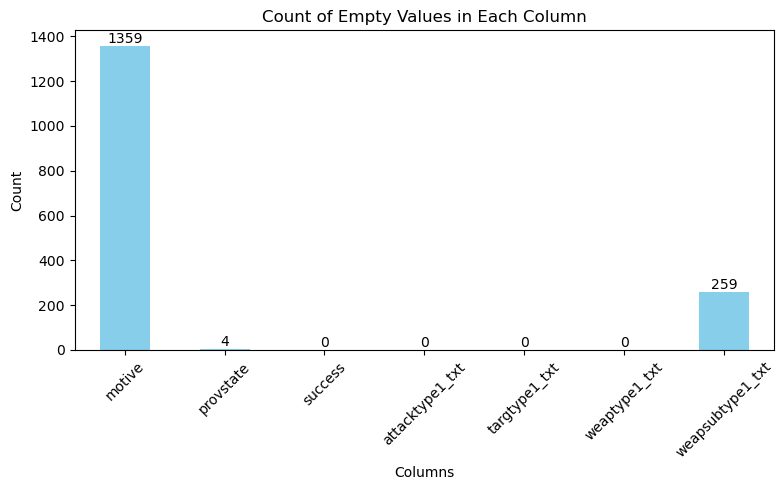

In [17]:
import matplotlib.pyplot as plt

# Assuming you have already calculated 'empty_values_count'
# You can create a bar chart to visualize it
plt.figure(figsize=(8, 5))  # Adjust the figure size as needed

# Plot the empty values count
ax = empty_values_count.plot(kind='bar', color='skyblue')
plt.title('Count of Empty Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Add text annotations for each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Save the figure as an image (e.g., PNG) or display it
# plt.savefig('empty_values_count.png', bbox_inches='tight')  # Uncomment to save as an image
plt.tight_layout()
plt.show()


# Data Preparation

## Filling Missing Values

Now we are going to fill the empty values in the column "motive" with the value "Unknown"

In [18]:
fUS['motive'] = fUS["motive"].fillna("unknown")

In [19]:
empty_values_count =fUS.isna().sum()
empty_values_count

motive                0
provstate             4
success               0
attacktype1_txt       0
targtype1_txt         0
weaptype1_txt         0
weapsubtype1_txt    259
dtype: int64

We still have empty valyes in the last weapon column so we are replacing them with the values in the previous weapons column. then we will delete the "weaptype1_txt" column

In [20]:
fUS["weapsubtype1_txt"].fillna(fUS["weaptype1_txt"],inplace=True)

In [21]:
# delete the first weapon variable
fUS.drop("weaptype1_txt",axis=1,inplace=True)

In [22]:
empty_values_count =fUS.isna().sum()
empty_values_count

motive              0
provstate           4
success             0
attacktype1_txt     0
targtype1_txt       0
weapsubtype1_txt    0
dtype: int64

Because there are only 4 empty variables in the provstate column we decided to delete them.

In [23]:
fUS.dropna(subset=['provstate'],inplace=True)

In [24]:
empty_values_count =fUS.isna().sum()
empty_values_count

motive              0
provstate           0
success             0
attacktype1_txt     0
targtype1_txt       0
weapsubtype1_txt    0
dtype: int64

In [25]:
fUS.dtypes

motive              object
provstate           object
success              int64
attacktype1_txt     object
targtype1_txt       object
weapsubtype1_txt    object
dtype: object

## Data Transformation

### Transformation for Textual Data (TF-IDF)

Since in comparison to the other variables, "motive" seems to contain more text data than our other variables that contain predefined categories, we are going to use TF-IDF Vectorization for "motive" and one hot encoding for the rest of them

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=200)
vectors = vectorizer.fit_transform(fUS["motive"])

wordsDF = pd.DataFrame(vectors.toarray(), columns=vectorizer.get_feature_names_out())
wordsDF.head()

,abortion,additionally,african,against,agree,allah,allege,also,america,american,...,which,while,white,who,wing,with,within,witness,would,zebra
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
wordsDF.loc[(wordsDF["abortion"] > 0) | (wordsDF["african"] > 0) | (wordsDF["against"] > 0) | (wordsDF["agree"] > 0) | (wordsDF["america"] > 0)].head()

,abortion,additionally,african,against,agree,allah,allege,also,america,american,...,which,while,white,who,wing,with,within,witness,would,zebra
10,0.0,0.0,0.367459,0.0,0.0,0.0,0.0,0.0,0.0,0.332888,...,0.0,0.0,0.000000,0.362847,0.0,0.000000,0.0,0.0,0.0,0.0
16,0.0,0.0,0.367522,0.0,0.0,0.0,0.0,0.0,0.0,0.332945,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
18,0.0,0.0,0.313163,0.0,0.0,0.0,0.0,0.0,0.0,0.283701,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
33,0.0,0.0,0.436438,0.0,0.0,0.0,0.0,0.0,0.0,0.395378,...,0.0,0.0,0.407882,0.000000,0.0,0.405229,0.0,0.0,0.0,0.0
66,0.0,0.0,0.393729,0.0,0.0,0.0,0.0,0.0,0.0,0.356687,...,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0


### Transformation for Categorical Variables (Dummies)

In [28]:
import pandas as pd

# Assume 'df' is your DataFrame with categorical variables
# Select the columns that are categorical
categorical_cols = ['provstate', 'attacktype1_txt', 'targtype1_txt','weapsubtype1_txt']

# Use pandas' get_dummies function for one-hot encoding
df_encoded = pd.get_dummies(fUS, columns=categorical_cols).reset_index()
df_encoded.head()


,index,motive,success,provstate_Alabama,provstate_Alaska,provstate_Arizona,provstate_Arkansas,provstate_California,provstate_Colorado,provstate_Connecticut,...,weapsubtype1_txt_Sabotage Equipment,weapsubtype1_txt_Sticky Bomb,weapsubtype1_txt_Suicide (carried bodily by human being),weapsubtype1_txt_Time Fuse,weapsubtype1_txt_Unknown,weapsubtype1_txt_Unknown Explosive Type,weapsubtype1_txt_Unknown Gun Type,weapsubtype1_txt_Unknown Weapon Type,weapsubtype1_txt_Vehicle,"weapsubtype1_txt_Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)"
0,5,To protest the Cairo Illinois Police Deparment,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,7,unknown,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,8,To protest the War in Vietnam and the draft,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,To protest the War in Vietnam and the draft,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10,unknown,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [29]:
df_encoded.drop(["index","motive"],axis=1,inplace=True)

In [30]:
wordsDF.shape

(2832, 200)

In [31]:
df_encoded.shape

(2832, 123)

In [32]:
df_encoded.head()

,success,provstate_Alabama,provstate_Alaska,provstate_Arizona,provstate_Arkansas,provstate_California,provstate_Colorado,provstate_Connecticut,provstate_Delaware,provstate_District of Columbia,...,weapsubtype1_txt_Sabotage Equipment,weapsubtype1_txt_Sticky Bomb,weapsubtype1_txt_Suicide (carried bodily by human being),weapsubtype1_txt_Time Fuse,weapsubtype1_txt_Unknown,weapsubtype1_txt_Unknown Explosive Type,weapsubtype1_txt_Unknown Gun Type,weapsubtype1_txt_Unknown Weapon Type,weapsubtype1_txt_Vehicle,"weapsubtype1_txt_Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)"
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [33]:
fullUS = pd.concat([df_encoded,wordsDF],axis=1)
fullUS.head()

,success,provstate_Alabama,provstate_Alaska,provstate_Arizona,provstate_Arkansas,provstate_California,provstate_Colorado,provstate_Connecticut,provstate_Delaware,provstate_District of Columbia,...,which,while,white,who,wing,with,within,witness,would,zebra
0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
fullUS.shape

(2832, 323)

# Modelling

## MULTINOMINAL NAIVE BAYES MODEL

In [35]:
# Using Multinominal Naive Bayes

In [36]:
## Step 1. Import Necessary Libraries & Packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [37]:
# confirming my data
fullUS.tail()

,success,provstate_Alabama,provstate_Alaska,provstate_Arizona,provstate_Arkansas,provstate_California,provstate_Colorado,provstate_Connecticut,provstate_Delaware,provstate_District of Columbia,...,which,while,white,who,wing,with,within,witness,would,zebra
2827,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2828,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.205566,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2829,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2830,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2831,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
# Step 2. Split the data in to features (X) &  Labels (Y)

X_features = fullUS.drop(['success'], axis=1)
y = fullUS['success']

In [61]:
# Step 3. Split the Data into Training 70% & Test Data 30%
X_features_train, X_features_test, y_train, y_test = train_test_split(X_features, y, test_size=0.3, random_state=42)

In [62]:
reports = []
accuracies = []
cross_accuracies = []
cross_std = []

In [63]:
# Step 4. Create a Multinominal Naive Bayes Classifier
nb_classifier = MultinomialNB()
# Step 5.  Train the Classifier on the combined features
nb_classifier.fit(X_features_train, y_train)
# Step 6. Make predictions on the combined test data
y_pred = nb_classifier.predict(X_features_test)
# Step 7. Calculate the accuracy and display the classification report
accuracy = accuracy_score(y_test, y_pred)
accuracies.append(accuracy)
print(f'Accuracy: {accuracy:.2f}')

report = classification_report(y_test, y_pred)
print(report)
report = classification_report(y_test, y_pred, output_dict=True)
reports.append(report)

Accuracy: 0.84
              precision    recall  f1-score   support

           0       0.55      0.25      0.35       147
           1       0.86      0.96      0.91       703

    accuracy                           0.84       850
   macro avg       0.71      0.60      0.63       850
weighted avg       0.81      0.84      0.81       850



In [64]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation (e.g., 10-fold cross-validation)
num_folds = 10
scores = cross_val_score(MultinomialNB(), X_features, y, cv=num_folds)

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Score:", np.mean(scores))
print("Standard Deviation:", np.std(scores))

cross_accuracies.append(np.mean(scores))
cross_std.append(np.std(scores))

Cross-Validation Scores: [0.80633803 0.79577465 0.77385159 0.82332155 0.77385159 0.80565371
 0.83745583 0.81978799 0.83745583 0.83745583]
Mean Score: 0.8110946598317822
Standard Deviation: 0.023175050259047526


## KNN MODEL

In [65]:
# Import necessary libraries
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Create a KNN classifier with a specified number of neighbors (e.g., 3)
k = 2
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Fit the classifier to the training data
knn_classifier.fit(X_features_train, y_train)

# Make predictions on the test data
y_pred = knn_classifier.predict(X_features_test)

accuracy = accuracy_score(y_test, y_pred)
accuracies.append(accuracy)
print(f'Accuracy: {accuracy:.2f}')
# Generate a classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)
report = classification_report(y_test, y_pred, output_dict=True)
reports.append(report)



Accuracy: 0.72
              precision    recall  f1-score   support

           0       0.33      0.58      0.42       147
           1       0.90      0.76      0.82       703

    accuracy                           0.72       850
   macro avg       0.61      0.67      0.62       850
weighted avg       0.80      0.72      0.75       850



In [66]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation (e.g., 10-fold cross-validation)
num_folds = 10
scores = cross_val_score(KNeighborsClassifier(n_neighbors=k), X_features, y, cv=num_folds)

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Score:", np.mean(scores))
print("Standard Deviation:", np.std(scores))
cross_accuracies.append(np.mean(scores))
cross_std.append(np.std(scores))

Cross-Validation Scores: [0.64084507 0.69366197 0.72438163 0.76678445 0.68904594 0.66077739
 0.72791519 0.70671378 0.69964664 0.75265018]
Mean Score: 0.706242223659981
Standard Deviation: 0.03668699139930773


## Random Forest

In [67]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier with a specified number of estimators (e.g., 100)

random_forest_classifier = RandomForestClassifier(n_estimators=100, max_depth =55, min_samples_leaf=1, random_state=42 )
# 50 depth is good
# Fit the classifier to the training data
random_forest_classifier.fit(X_features_train, y_train)

# Make predictions on the test data
y_pred = random_forest_classifier.predict(X_features_test)

accuracy = accuracy_score(y_test, y_pred)
accuracies.append(accuracy)
print(f'Accuracy: {accuracy:.2f}')
# Generate a classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)
report = classification_report(y_test, y_pred, output_dict=True)
reports.append(report)

Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.60      0.32      0.42       147
           1       0.87      0.96      0.91       703

    accuracy                           0.85       850
   macro avg       0.74      0.64      0.66       850
weighted avg       0.82      0.85      0.83       850



### Cross Validation
Cross-Validation (k-Fold Cross-Validation):

- Purpose: Cross-validation is used to obtain a more robust and reliable estimate of a model's performance by evaluating it on multiple subsets of the data.
- Process: You divide your dataset into k subsets (folds) and perform training and testing k times. Each time, one fold is used as the test set, and the rest are used for training.
- Advantages: It provides a more stable estimate of model performance because it considers multiple train-test splits. It can help detect issues like overfitting and assess the model's variability.
- Disadvantages: It can be computationally expensive, especially for large datasets. In some cases, it may not be suitable, such as for time series data.

In [68]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation (e.g., 10-fold cross-validation)
num_folds = 10
scores = cross_val_score(RandomForestClassifier(n_estimators=100, max_depth =55, min_samples_leaf=1, random_state=42), X_features, y, cv=num_folds)

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Score:", np.mean(scores))
print("Standard Deviation:", np.std(scores))
cross_accuracies.append(np.mean(scores))
cross_std.append(np.std(scores))

Cross-Validation Scores: [0.81338028 0.80633803 0.85512367 0.83745583 0.84452297 0.77738516
 0.82332155 0.82332155 0.80212014 0.83038869]
Mean Score: 0.8213357885830888
Standard Deviation: 0.02148973187447719


#### Interpretation and Conclusion:

* Your model's accuracy on the test set (85%) is higher than the mean accuracy obtained from cross-validation (78%). This suggests that the model might perform slightly better on the specific test set you used than on average across different subsets of the data.

* The standard deviation of 0.058 indicates that there is some variability in the model's performance across different data splits. This is expected in real-world scenarios, as the model may perform better or worse on different subsets of the data.

* Overall, your model seems to perform reasonably well with an accuracy of 85% on the test set and a mean accuracy of 78% from cross-validation. The slight drop in accuracy from the test set to cross-validation is normal and may be due to variations in the data splits. It's important to consider the standard deviation as it provides information about the stability of the model's performance.

* Keep in mind that accuracy is just one metric, and it may not capture the full picture, especially in the presence of class imbalance. Depending on your specific problem and requirements, you might also want to consider other evaluation metrics, such as precision, recall, F1-score, or the ROC-AUC score, to assess the model comprehensively.

## Gradient Boosting Classifier

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score


# Create a Gradient Boosting Classifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.05, max_depth=15, random_state=42)

# Fit the model on the training data
clf.fit(X_features_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_features_test)

# Calculate accuracy on the test data
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
accuracies.append(accuracy)

# Generate a classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)
report = classification_report(y_test, y_pred, output_dict=True)
reports.append(report)


Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.60      0.33      0.43       147
           1       0.87      0.95      0.91       703

    accuracy                           0.85       850
   macro avg       0.73      0.64      0.67       850
weighted avg       0.82      0.85      0.83       850



In [70]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation (e.g., 10-fold cross-validation)
num_folds = 10
scores = cross_val_score(GradientBoostingClassifier(n_estimators=100, learning_rate=0.05, max_depth=15, random_state=42), X_features, y, cv=num_folds)

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Score:", np.mean(scores))
print("Standard Deviation:", np.std(scores))
cross_accuracies.append(np.mean(scores))
cross_std.append(np.std(scores))

Cross-Validation Scores: [0.79577465 0.79929577 0.85159011 0.84805654 0.81978799 0.78798587
 0.80565371 0.83392226 0.77738516 0.83392226]
Mean Score: 0.8153374309461008
Standard Deviation: 0.024530981182176757


In [71]:
len(reports),len(accuracies),len(cross_accuracies),len(cross_std)
# Reports for Naive Bayes, KNN, Random Forest, Gradient Boosting Classifiers

(4, 4, 4, 4)

In [72]:
reports[0].keys()

dict_keys(['0', '1', 'accuracy', 'macro avg', 'weighted avg'])

# Evaluation
A comparison between models
___

In [73]:
from prettytable import PrettyTable
from IPython.core.display import HTML

# Create a table to compare all results
model_names = ["Naive Bayes", "KNN", "Random Forest", "Gradient Boosting"]
# Create a PrettyTable for the HTML table
table = PrettyTable()
table.field_names = ["Model", "Class", "Precision", "Recall", "F1-Score", "Support"]
table.align = "l"  # Align text to the left for better readability

# Add data for each model
for model_name, report, acc, c_acc, c_std in zip(model_names, reports, accuracies, cross_accuracies, cross_std):
    # Add class-wise metrics
    for class_label, metrics in report.items():
        if class_label.isnumeric():
            precision = round(metrics["precision"], 2)
            recall = round(metrics["recall"], 2)
            f1_score = round(metrics["f1-score"], 2)
            support = metrics["support"]
            data_row = [model_name, class_label, precision, recall, f1_score, support]
            table.add_row(data_row)
    
    # Add the overall accuracy row
    table.add_row([model_name, "Overall Test Accuracy", "", "", round(acc, 2), ""])

# Convert the table to HTML with proper formatting
html_table = table.get_html_string(attributes={"class": "table table-striped"})
html_table = html_table.replace('<table border="1">', '<table class="table table-striped">')

# Print the HTML table
HTML(html_table)


Model,Class,Precision,Recall,F1-Score,Support
Naive Bayes,0,0.55,0.25,0.35,147
Naive Bayes,1,0.86,0.96,0.91,703
Naive Bayes,Overall Test Accuracy,,,0.84,
KNN,0,0.33,0.58,0.42,147
KNN,1,0.9,0.76,0.82,703
KNN,Overall Test Accuracy,,,0.72,
Random Forest,0,0.6,0.32,0.42,147
Random Forest,1,0.87,0.96,0.91,703
Random Forest,Overall Test Accuracy,,,0.85,
Gradient Boosting,0,0.6,0.33,0.43,147
